In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np 

In [55]:
data = pd.read_csv("data_analys.csv")

In [56]:
data

,Unnamed: 0,customer_id,order_approved_at_x,shipping_limit_date_x,review_comment_message,review_answer_timestamp_x,product_category_name,order_item_id_y,order_item_id_y.1,customer_city_y,...,review_score_x,review_score_x.1,date_achat_y,score_rec,review_score_y,review_score_y.1,score,score_montant,score_freq,score_rfm
0,0,08c5351a6aca1c1589a38f244edeee9d,2016-10-07 13:18:03,2016-10-26 18:25:19,1 mes de atraso na entrega !!! ultima compra q...,2016-11-15 16:00:34,moveis_decoracao,3,3,boa vista,...,1,1,2016-09-04,1,2,2,3,1,1,3
1,1,08c5351a6aca1c1589a38f244edeee9d,2016-10-07 13:18:03,2016-10-26 18:25:19,1 mes de atraso na entrega !!! ultima compra q...,2016-11-15 16:00:34,moveis_decoracao,3,3,boa vista,...,1,1,2016-09-04,1,2,2,3,1,1,3
2,2,683c54fc24d40ee9f8a6fc179fd9856c,2016-10-07 13:17:15,2016-09-19 00:15:34,Comprei dois produtos desta loja parceira da l...,2016-10-30 01:47:48,telefonia,1,1,passo fundo,...,1,1,2016-09-05,1,1,1,2,1,1,3
3,3,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,1,2016-09-15,1,3,3,4,1,1,3
4,4,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,1,2016-09-15,1,3,3,4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,112367,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,5,2018-08-29,5,25,25,5,5,1,11
112368,112368,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:31:07,2018-08-31 14:30:19,NaN,2018-10-24 16:27:36,moveis_cozinha_area_de_servico_jantar_e_jardim,3,3,curitiba,...,5,5,2018-08-29,5,10,10,5,5,1,11
112369,112369,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,5,2018-08-29,5,25,25,5,5,1,11
112370,112370,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,5,2018-08-29,5,25,25,5,5,1,11


In [57]:
from sklearn.cluster import KMeans
import pandas as pd

# Define the number of clusters
n_clusters = 4

# Use only the RFM score for clustering
X = data[["score_rfm"]].values

# Initialize the k-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the data frame as a new column
data["cluster"] = labels

# Group the data by cluster to see the statistics for each cluster
grouped = data.groupby("cluster").agg({"score_rfm": "mean"})

# Print the statistics for each cluster
print(grouped)


         score_rfm
cluster           
0         7.998408
1         5.013952
2        10.999119
3         3.010739


/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



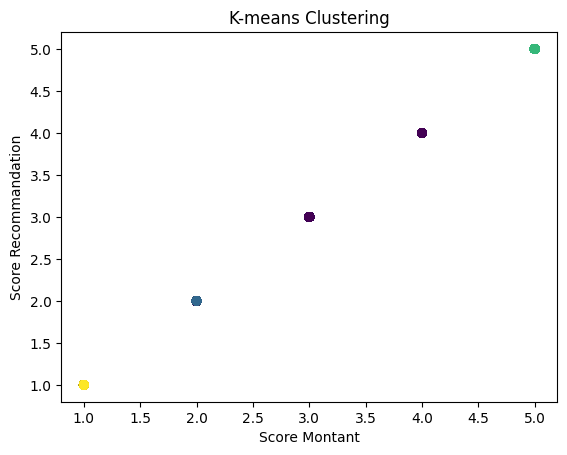

In [58]:
import matplotlib.pyplot as plt

plt.scatter(data["score_montant"], data["score_rec"], c=kmeans.labels_)
plt.xlabel("Score Montant")
plt.ylabel("Score Recommandation")
plt.title("K-means Clustering")
plt.show()


In [59]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(data[["score_montant", "score_rec"]], kmeans.labels_)
print("Silhouette Score:", silhouette_score)


Silhouette Score: 0.7865787140767504


In [60]:
import matplotlib.pyplot as plt

# Assign the cluster labels to a new column in the dataframe
data["cluster"] = kmeans.labels_

# Create a scatter plot, coloring each data point based on its cluster assignment
plt.scatter(data[data["cluster"] == 0]["feature_1"], data[data["cluster"] == 0]["feature_2"], color="red", label="Cluster 1")
plt.scatter(data[data["cluster"] == 1]["feature_1"], data[data["cluster"] == 1]["feature_2"], color="blue", label="Cluster 2")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


KeyError: 'feature_1'

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


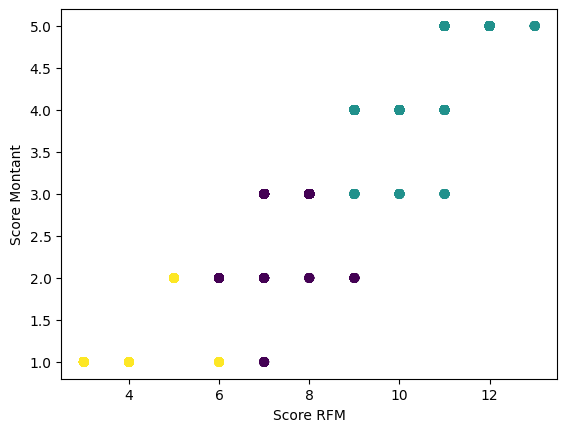

In [ ]:
import matplotlib.pyplot as plt

# Fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[["score_rfm", "score_montant"]])

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Plot the data points, coloring each one based on its cluster assignment
plt.scatter(data["score_rfm"], data["score_montant"], c=cluster_assignments)
plt.xlabel("Score RFM")
plt.ylabel("Score Montant")
plt.show()


In [ ]:
data.columns

Index(['Unnamed: 0', 'customer_id', 'order_approved_at_x',
       'shipping_limit_date_x', 'review_comment_message',
       'review_answer_timestamp_x', 'product_category_name', 'order_item_id_y',
       'order_item_id_y.1', 'customer_city_y', 'customer_state_y',
       'order_id_y', 'order_status_y', 'seller_id_y', 'price_x', 'price_x.1',
       'freight_value_x', 'freight_value_x.1', 'review_score_x',
       'review_score_x.1', 'date_achat_y', 'score_rec', 'review_score_y',
       'review_score_y.1', 'score', 'score_montant', 'score_freq', 'score_rfm',
       'cluster'],
      dtype='object')

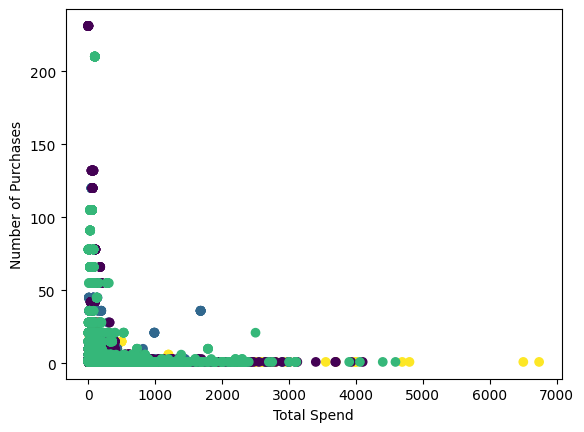

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data["price_x"], data["order_item_id_y"], c=data["cluster"], cmap="viridis")
plt.xlabel("Total Spend")
plt.ylabel("Number of Purchases")
plt.show()


In [ ]:
data

,Unnamed: 0,customer_id,order_approved_at_x,shipping_limit_date_x,review_comment_message,review_answer_timestamp_x,product_category_name,order_item_id_y,order_item_id_y.1,customer_city_y,...,review_score_x.1,date_achat_y,score_rec,review_score_y,review_score_y.1,score,score_montant,score_freq,score_rfm,cluster
0,0,08c5351a6aca1c1589a38f244edeee9d,2016-10-07 13:18:03,2016-10-26 18:25:19,1 mes de atraso na entrega !!! ultima compra q...,2016-11-15 16:00:34,moveis_decoracao,3,3,boa vista,...,1,2016-09-04,1,2,2,3,1,1,3,3
1,1,08c5351a6aca1c1589a38f244edeee9d,2016-10-07 13:18:03,2016-10-26 18:25:19,1 mes de atraso na entrega !!! ultima compra q...,2016-11-15 16:00:34,moveis_decoracao,3,3,boa vista,...,1,2016-09-04,1,2,2,3,1,1,3,3
2,2,683c54fc24d40ee9f8a6fc179fd9856c,2016-10-07 13:17:15,2016-09-19 00:15:34,Comprei dois produtos desta loja parceira da l...,2016-10-30 01:47:48,telefonia,1,1,passo fundo,...,1,2016-09-05,1,1,1,2,1,1,3,3
3,3,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,2016-09-15,1,3,3,4,1,1,3,3
4,4,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,2016-09-15,1,3,3,4,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,112367,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,2
112368,112368,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:31:07,2018-08-31 14:30:19,NaN,2018-10-24 16:27:36,moveis_cozinha_area_de_servico_jantar_e_jardim,3,3,curitiba,...,5,2018-08-29,5,10,10,5,5,1,11,2
112369,112369,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,2
112370,112370,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,2


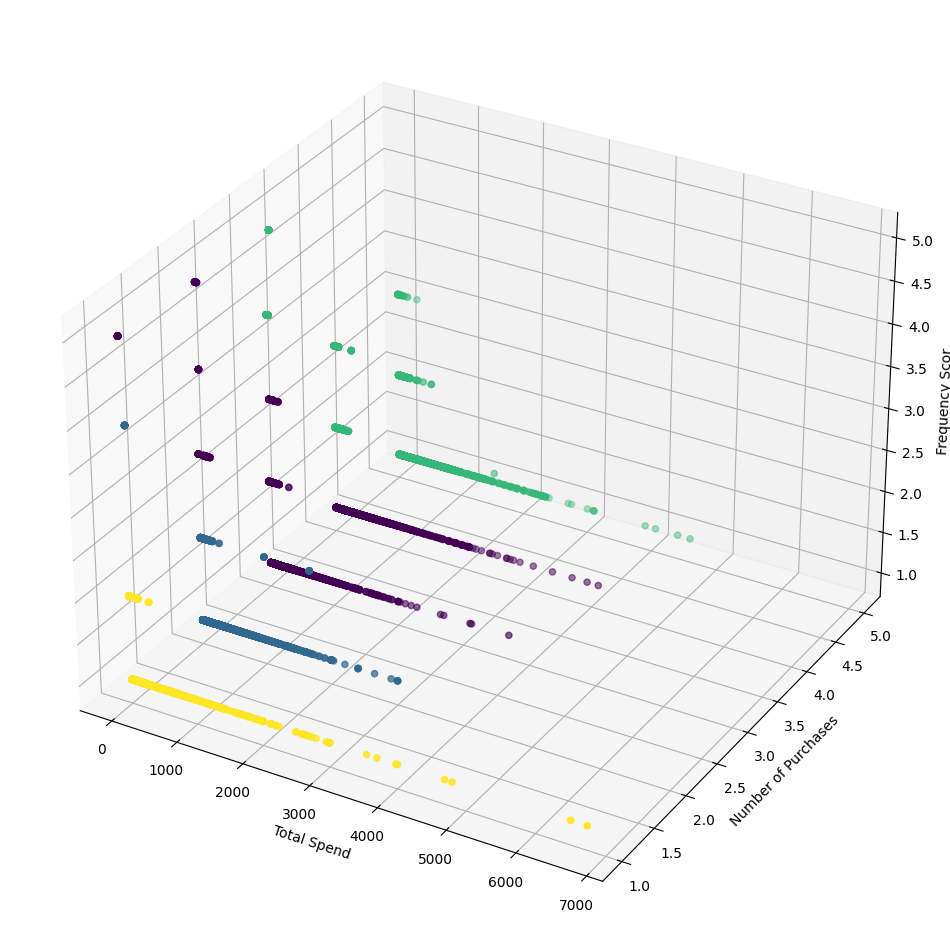

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["price_x"], data["score_rec"], data["score_freq"], c=data["cluster"], cmap="viridis")
ax.set_xlabel("Total Spend")
ax.set_ylabel("Number of Purchases")
ax.set_zlabel("Frequency Scor")

plt.show()


In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [ ]:
categorical_columns

['customer_id', 'order_approved_at_x', 'order_status_y']

In [ ]:
data.dtypes

customer_id             object
order_approved_at_x     object
order_status_y          object
price_x                float64
price_x.1              float64
freight_value_x        float64
review_score_x           int64
review_score_x.1         int64
score_rec                int64
review_score_y           int64
score                    int64
score_montant            int64
score_freq               int64
score_rfm                int64
cluster                  int32
dtype: object

In [ ]:
data = data.drop(['product_category_name'], axis=1)


In [ ]:
data.columns

Index(['Unnamed: 0', 'customer_id', 'order_approved_at_x',
       'shipping_limit_date_x', 'review_comment_message',
       'review_answer_timestamp_x', 'order_item_id_y', 'order_item_id_y.1',
       'customer_city_y', 'customer_state_y', 'order_id_y', 'order_status_y',
       'seller_id_y', 'price_x', 'price_x.1', 'freight_value_x',
       'freight_value_x.1', 'review_score_x', 'review_score_x.1',
       'date_achat_y', 'score_rec', 'review_score_y', 'review_score_y.1',
       'score', 'score_montant', 'score_freq', 'score_rfm', 'cluster'],
      dtype='object')

In [74]:
for i in categorical_columns:
    data = data.drop(i,axis =1)

In [77]:
float_columns = data.select_dtypes(include=['float']).columns.tolist()
int32_columns = data.select_dtypes(include=['int32']).columns.tolist()
int64_columns = data.select_dtypes(include=['int64']).columns.tolist()

In [78]:
to_keep_columns = float_columns + int32_columns + int64_columns

In [79]:
to_keep_columns

['price_x',
 'price_x.1',
 'freight_value_x',
 'freight_value_x.1',
 'cluster',
 'Unnamed: 0',
 'order_item_id_y',
 'order_item_id_y.1',
 'review_score_x',
 'review_score_x.1',
 'score_rec',
 'review_score_y',
 'review_score_y.1',
 'score',
 'score_montant',
 'score_freq',
 'score_rfm']

In [80]:
data_elbow = data[to_keep_columns]

In [81]:
data = data_elbow

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/

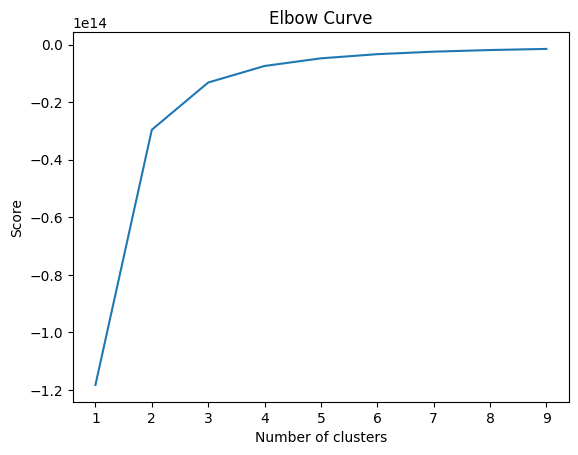

In [82]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

def find_optimal_clusters(data):
    # Number of clusters
    k = range(1, 10)
    km = [KMeans(n_clusters=i) for i in k]
    score = [km[i].fit(data).score(data) for i in range(len(km))]
    
    # Plot the elbow
    plt.plot(k, score)
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()
    
    # Use knee locator to determine optimal number of clusters
    kn = KneeLocator(k, score, curve='convex', direction='decreasing')
    return kn.knee

# Find optimal number of clusters for your data
optimal_clusters = find_optimal_clusters(data)


In [83]:
optimal_clusters

1

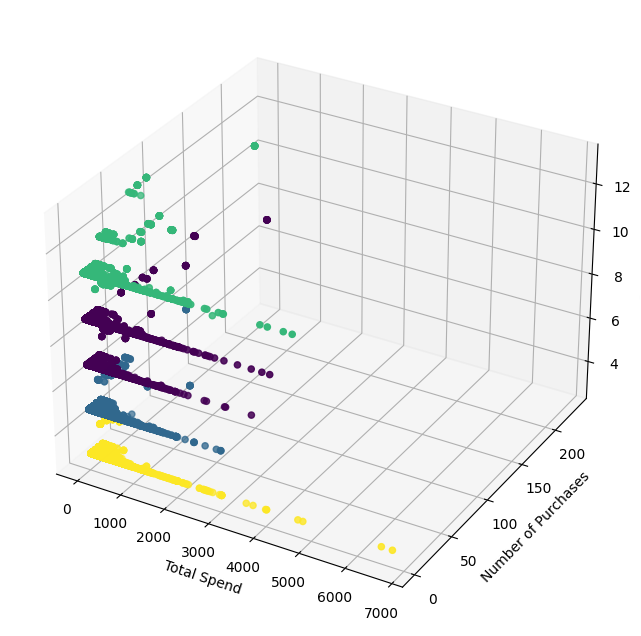

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["price_x"], data["order_item_id_y"], data["score_rfm"], c=data["cluster"], cmap="viridis")
ax.set_xlabel("Total Spend")
ax.set_ylabel("Number of Purchases")
ax.set_zlabel("Score_rfm")
plt.show()


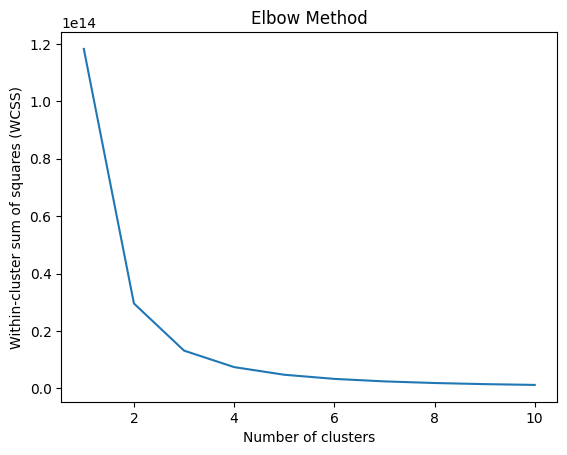

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Fit the KMeans model for a range of different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS versus number of clusters
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.show()


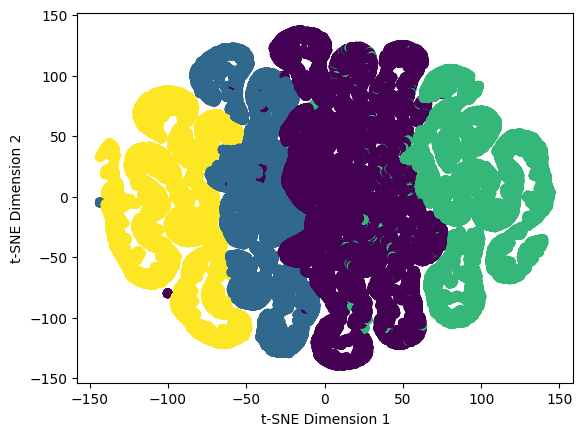

In [88]:
from sklearn.manifold import TSNE

# create the t-SNE object with the desired parameters
tsne = TSNE()

# fit and transform the data
reduced_data = tsne.fit_transform(data)

# plot the transformed data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data["cluster"], cmap="viridis")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [101]:
dfa = pd.read_csv("data_analys.csv")

In [102]:
dfa["dummy"] = 1

In [103]:
dfe = dfa.groupby(dfa.order_id_y).sum().reset_index()

/tmp/ipykernel_41770/674243015.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [104]:
dfe.drop_duplicates()

,order_id_y,Unnamed: 0,order_item_id_y,order_item_id_y.1,price_x,price_x.1,freight_value_x,freight_value_x.1,review_score_x,review_score_x.1,score_rec,review_score_y,review_score_y.1,score,score_montant,score_freq,score_rfm,dummy
0,00010242fe8c5a6d1ba2dd792cb16214,28183,1,1,58.90,58.90,13.29,13.29,5,5,2,5,5,2,2,1,5,1
1,00018f77f2f0320c557190d7a144bdd3,8562,1,1,239.90,239.90,19.93,19.93,4,4,1,4,4,5,1,1,3,1
2,000229ec398224ef6ca0657da4fc703e,54627,1,1,199.00,199.00,17.87,17.87,5,5,3,5,5,5,3,1,7,1
3,00024acbcdf0a6daa1e931b038114c75,107696,1,1,12.99,12.99,12.79,12.79,4,4,5,4,4,1,5,1,11,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1563,1,1,199.90,199.90,18.14,18.14,5,5,1,5,5,5,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97912,fffc94f6ce00a00581880bf54a75a037,81270,1,1,299.99,299.99,43.41,43.41,5,5,4,5,5,5,4,1,9,1
97913,fffcd46ef2263f404302a634eb57f7eb,100404,1,1,350.00,350.00,36.53,36.53,5,5,5,5,5,5,5,1,11,1
97914,fffce4705a9662cd70adb13d4a31832d,34936,1,1,99.90,99.90,16.95,16.95,5,5,2,5,5,3,2,1,5,1
97915,fffe18544ffabc95dfada21779c9644f,23242,1,1,55.99,55.99,8.72,8.72,5,5,2,5,5,2,2,1,5,1


In [105]:
dfe.dummy.unique()

array([ 1,  2,  3,  4,  5,  6,  8,  7, 20, 12, 10, 13, 15, 22, 11, 14, 21,
        9])

In [107]:
dfa[dfa["order_id_y"].duplicated(keep=False)]

,Unnamed: 0,customer_id,order_approved_at_x,shipping_limit_date_x,review_comment_message,review_answer_timestamp_x,product_category_name,order_item_id_y,order_item_id_y.1,customer_city_y,...,review_score_x.1,date_achat_y,score_rec,review_score_y,review_score_y.1,score,score_montant,score_freq,score_rfm,dummy
0,0,08c5351a6aca1c1589a38f244edeee9d,2016-10-07 13:18:03,2016-10-26 18:25:19,1 mes de atraso na entrega !!! ultima compra q...,2016-11-15 16:00:34,moveis_decoracao,3,3,boa vista,...,1,2016-09-04,1,2,2,3,1,1,3,1
1,1,08c5351a6aca1c1589a38f244edeee9d,2016-10-07 13:18:03,2016-10-26 18:25:19,1 mes de atraso na entrega !!! ultima compra q...,2016-11-15 16:00:34,moveis_decoracao,3,3,boa vista,...,1,2016-09-04,1,2,2,3,1,1,3,1
3,3,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,2016-09-15,1,3,3,4,1,1,3,1
4,4,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,2016-09-15,1,3,3,4,1,1,3,1
5,5,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,2016-09-19 23:11:33,nao recebi o produto e nem resposta da empresa,2016-10-07 18:32:28,beleza_saude,6,6,sao joaquim da barra,...,1,2016-09-15,1,3,3,4,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112364,112364,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,1
112367,112367,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,1
112368,112368,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:31:07,2018-08-31 14:30:19,NaN,2018-10-24 16:27:36,moveis_cozinha_area_de_servico_jantar_e_jardim,3,3,curitiba,...,5,2018-08-29,5,10,10,5,5,1,11,1
112369,112369,448945bc713d98b6726e82eda6249b9e,2018-08-29 09:04:10,2018-09-06 09:04:10,NaN,2018-09-01 16:57:41,beleza_saude,15,15,sao jose dos campos,...,5,2018-08-29,5,25,25,5,5,1,11,1


au moment du merge , enlever les doublons 